<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/Tokenization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.tokenize import(TreebankWordTokenizer,
                          TweetTokenizer,
                          MWETokenizer)

In [ ]:
#Create tokenizers:
tree = TreebankWordTokenizer()
tweet = TweetTokenizer()
mwe = MWETokenizer()

# Create a string input
sent1 = 'There are more things in heaven and earth, Horatio, than are dreamt of in your philosophy'
     
# Use tokenize method
print(f'Treebank -> {tree.tokenize(sent1)}')
print(f'Tweettokenizer -> {tweet.tokenize(sent1)}')
print(f'MWEtokenizer -> {mwe.tokenize(sent1)}')

Treebank -> ['There', 'are', 'more', 'things', 'in', 'heaven', 'and', 'earth', ',', 'Horatio', ',', 'than', 'are', 'dreamt', 'of', 'in', 'your', 'philosophy']
Tweettokenizer -> ['There', 'are', 'more', 'things', 'in', 'heaven', 'and', 'earth', ',', 'Horatio', ',', 'than', 'are', 'dreamt', 'of', 'in', 'your', 'philosophy']
MWEtokenizer -> ['T', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 't', 'h', 'i', 'n', 'g', 's', ' ', 'i', 'n', ' ', 'h', 'e', 'a', 'v', 'e', 'n', ' ', 'a', 'n', 'd', ' ', 'e', 'a', 'r', 't', 'h', ',', ' ', 'H', 'o', 'r', 'a', 't', 'i', 'o', ',', ' ', 't', 'h', 'a', 'n', ' ', 'a', 'r', 'e', ' ', 'd', 'r', 'e', 'a', 'm', 't', ' ', 'o', 'f', ' ', 'i', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'h', 'i', 'l', 'o', 's', 'o', 'p', 'h', 'y']


**Neural Nets**

In [ ]:
#This is a tokenization example while working with neural nets.  Info only,  this is not directly applicable to the current use case:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
sent2 = "Mary had a little lumb and, according to GPT3, ate it with the mint jelly"
encoded_input = tokenizer(sent2)
print(encoded_input.input_ids)

[101, 2090, 1125, 170, 1376, 181, 1818, 1830, 1105, 117, 2452, 1106, 15175, 1942, 1495, 117, 8756, 1122, 1114, 1103, 22532, 179, 23083, 102]


In [ ]:
pip install spacy-transformers

In [ ]:
import spacy
from termcolor import colored

In [ ]:
import spacy.cli

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
spacy.cli.download('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp_sm = spacy.load('en_core_web_sm')

In [ ]:
nlp_lg = spacy.load('en_core_web_lg')

In [ ]:
nlp_trf = spacy.load("en_core_web_trf")

In [ ]:
st = ['Make it so we can hide and unhide the carousel',
      'Mary had a little lamb and, according to GPT3, ate it with the mint jelly',
      '-The well-tested code',
      "I'M GONNA PUKE",
      'Much sleeker. Very attractive!..I would strongly recommend',
      'CoughROOTCough',
      "So...I'm very happy",
      'A starling among starlings',
      'It was a love-fest',
      "It's great!",
      'Kindle-Fire is on fire'
      ]

In [ ]:
doc_sm = []
for item in st:
  doc_sm.append(nlp_sm(item))

In [ ]:
doc_lg = []
for item in st:
  doc_lg.append(nlp_lg(item))

In [ ]:
doc_trf = []
for item in st:
  doc_trf.append(nlp_trf(item))

In [ ]:
doc = nlp('Make it so we can hide and unhide the carousel')

In [ ]:
def res_prt(doc,st):
  for item, text in zip(doc,st):
    print(colored(text,'red'))
    for token in item:
      print(token.text,token.pos_, token.tag_)
    print(' ')

In [ ]:
print(colored('EN_CORE_WEB_LG','blue'))
res_prt(doc_lg,st)
print(colored('EN_CORE_WEB_SM','blue'))
res_prt(doc_sm,st)

In [ ]:
res_prt(doc_trf,st)

In [ ]:
for token in doc:
    print(token.text,token.pos_, token.tag_)

In [ ]:
doc = nlp('I have limited bookshelf space.')

-The well-tested code<br> '\n-The well-tested code'<br>stopwords when spelled out: 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 20, 40, 50, 60, 100<br>
not stopwords when spelled out: 7, 13, 14, 16, 17, 18, 19, 30, 70, 80, 90, 1000, 100000<br>Splits "3G", though not "401k"</br>Splits hyphenated words (including, e.g. "thirty-six", "x-ray", "wi-fi")<br>Doesn't catch multiword tokens like "in front of" or "according to"<br>I'M GONNA PUKE<br>Much sleeker. Very attractive!..I would strongly recommend<br>sturdy(something<br>Rosette calls "CoughROOTCough" a proper noun, which, sure.  Spacy calls it a number, which, what?<br>"So...I'm very happy."<br>"A starling among starlings."<br>"It was a love-fest"<br>'Its great!'


# Text Analysis

In [1]:
import json
import re
import numpy as np

In [25]:
from scipy.spatial import distance

In [2]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving kindle.json to kindle.json


In [3]:
data = []
with open('kindle.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [20]:
data[50]['text']

'I already owned the "regular Kindle" that I used to read books, and to upload my own novel drafts onto to read for editing, which by the way, for you authors/writers out there, is a wonderful way to edit your draft works. I didn\'t want to spend the money on an iPad, and really, thought the iPad would be more than I needed. The Kindle Fire HD 7" seemed the perfect choice for me and I haven\'t been disappointed.\n\nThe graphics are beautiful, more than I thought they\'d be, and I can\'t wait to upload photos to it. I\'ve yet to explore all the things my Kindle Fire can do, so I\'m excited to see what else I\'ll discover.\n\nThe sound quality is also better than I would have imagined, nice and clear and enough volume.\n\nIt\'s way faster than I imagined, and in fact, I haven\'t had any delays or dragging at all. Maybe as I upload things it\'ll slow up, but for now, it\'s quite fast.\n\nI uploaded my first and only game (I\'m not a gamer), Solitaire, and of course it was lighting fast to

In [4]:
txts = [] 
for item in data:
  txts.append(re.sub('\n+', ' ', item['text']))

**Google Unviersal Encoder Model**

In [5]:
!pip install -q tensorflow-hub
import tensorflow_hub as hub

In [6]:
#using universal sentence encoder to get sentence encodings
#Load the Universal Sentence Encoder's TF Hub module
#param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
print ("module {} loaded".format(module_url))
model = hub.load(module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


**lumi embeddings**

In [ ]:
test_data = np.load('vector.npz')
test_data['vect'][0]

In [22]:
test_data['vect'].shape

(6965, 300)

In [30]:
lumi = []
for row in test_data['vect']:
  lumi.append(row)

In [33]:
lumi[0][0]

0.9424514770507812

**embedding using universal encoder**

In [7]:
concepts = ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']
concept_vectors = np.array(model(concepts))

In [9]:
embedding_tuples = []
for item in txts:
  tmp = embed([item]).numpy(),item
  embedding_tuples.append(tmp)

In [109]:
test = []
for item in txts:
  test.append(embed([item]).numpy().flatten())

In [110]:
test = np.array(test); test.shape

(6965, 512)

In [111]:
test_test = np.concatenate((test,concept_vectors), axis=0); test_test.shape

(6975, 512)

In [11]:
# data visualization:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [34]:
# visualization code
def tsne_plot(emb):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for i in range(len(emb)):
        #tokens.append(emb[i][0])
        #labels.append(emb[i][1])
    tkns = np.array(emb)
    tkns = tkns.reshape(tkns.shape[0], -1)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tkns)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    #Outputting all the embeddings
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
    plt.show()

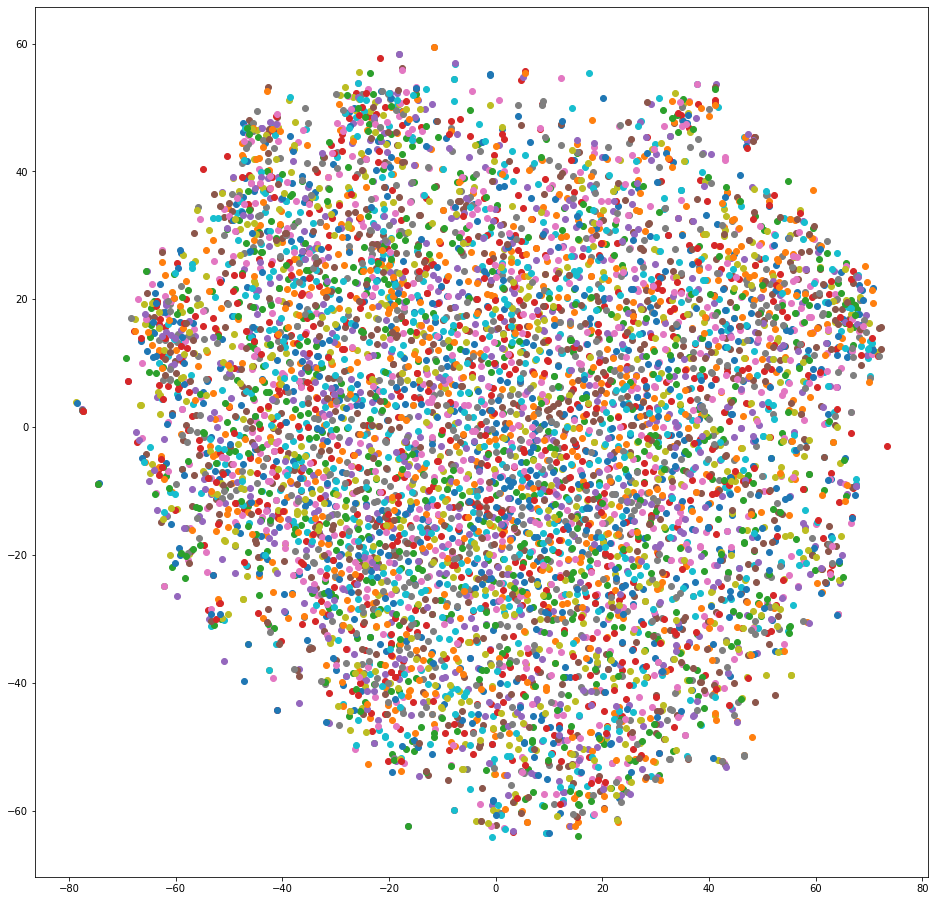

In [35]:
#tsne_plot(embedding_tuples)
tsne_plot(lumi)

In [106]:
# some funcier visualization code
def tsne_plot_fancy(emb, points):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for i in range(len(emb)):
        #tokens.append(emb[i][0])
        #labels.append(emb[i][1])
    #tokens = np.array(emb)
    #print(tokens[:1])
    #tokens = tokens.reshape(tokens.shape[0], -1)
    #points = points.reshape(tkns.shape[0], -1)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(emb)
    #concepts_values = tsne_model.fit_transform(points)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    
    x_p = []
    y_p = []
    for value in new_values[-10:]:
        x_p.append(value[0])
        y_p.append(value[1])    

        
    plt.figure(figsize=(16, 16)) 
    #Outputting all the embeddings and overlying concepts
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
    for i in range(len(x_p)):
        plt.scatter(x_p[i],y_p[i],s=500,c='lightblue')  
    plt.show()

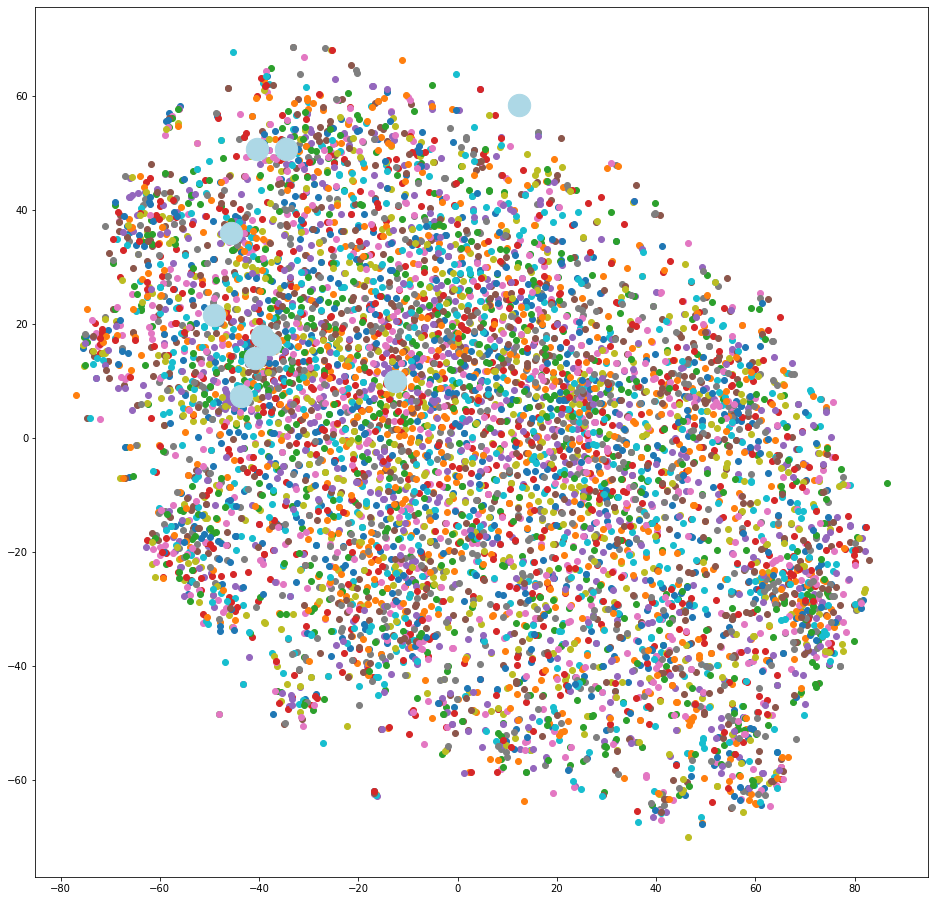

In [113]:
#tsne_plot with concepts overlay(embedding_tuples)
tsne_plot_fancy(test,concept_vectors)

*USEFUL CODE SNIPPETS*

In [88]:
#concept_vectors.shape
a=np.zeros((90,512))
concept_vectors_padded = np.concatenate((concept_vectors,a), axis=0); concept_vectors_padded.shape

(100, 512)

In [28]:
str1 = 'I\'m good'
str2 =  "I'm good"
str3 = 'I am good' 
inp = [str1,str2,str3]

In [34]:
out = np.array(model(inp))

In [45]:
distance.cosine(out[0],out[1])

0.0

In [ ]:
!unzip file_location

In [ ]:
for item in data:
  re.sub('\n+', ' ' item['text'])